## Project Overview
# Instagram Analytics Data Analysis & Machine Learning Project

# Objective
The goal in this project is to:
- Load and explore the data
- Clean and prepare the dataset
- Perform exploratory data analysis (EDA)
- Visualise insights in multiple ways
- Apply a simple machine learning model
- Conclusions

## Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Improve plot appearance
plt.style.use("ggplot")

## Load the Data

In [2]:
df = pd.read_csv("Instagram_Analytics.csv")
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


## Explotary Data Analysis (EDA)

In [3]:
# Check data shape (rows, columns)
df.shape

(29999, 15)

In [4]:
# View column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB


In [5]:
# Statistical summary
df.describe()

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


## Data Cleaning and Preparation

In [6]:
# Convert upload_date to datetime format
df["upload_date"] = pd.to_datetime(df["upload_date"])

In [7]:
# Check for missing values
df.isnull().sum()

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64

No missing values, dataset is clean.

In [8]:
# Feature engineering
# Create additional time-based features
df["upload_month"] = df["upload_date"].dt.month
df["upload_day"] = df["upload_date"].dt.day_name()

## Visualisation

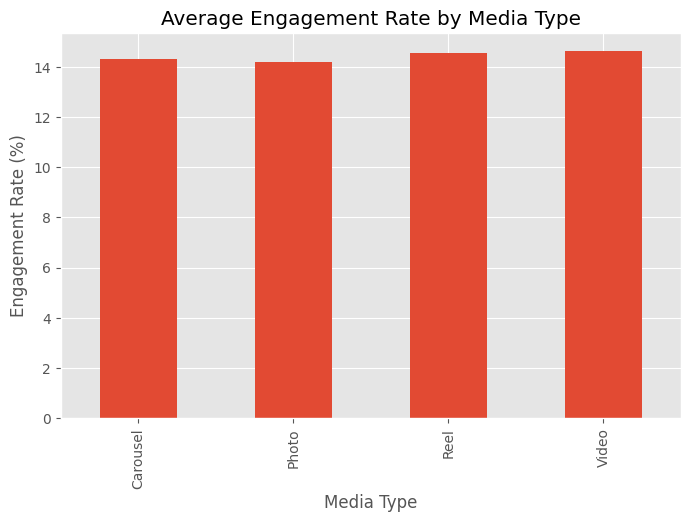

In [9]:
# Engagement rate by media type
# To show comparative analysis
media_engagement = df.groupby("media_type")["engagement_rate"].mean()

media_engagement.plot(kind="bar", figsize=(8, 5))
plt.title("Average Engagement Rate by Media Type")
plt.xlabel("Media Type")
plt.ylabel("Engagement Rate (%)")
plt.show()

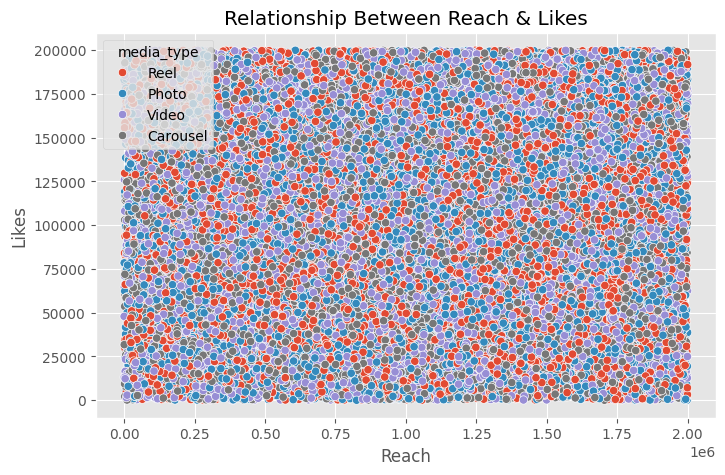

In [10]:
# Relationship between reach & likes
# To show correlation thinking and multivariable plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="reach", y="likes", hue="media_type")
plt.title("Relationship Between Reach & Likes")
plt.xlabel("Reach")
plt.ylabel("Likes")
plt.show()

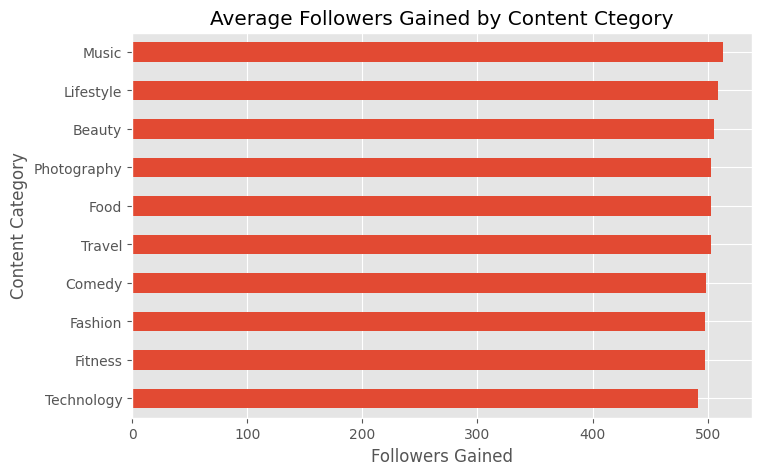

In [11]:
# Followers gained by content category
# Business insight-oriented visualisation
category_followers = df.groupby("content_category")["followers_gained"].mean()
category_followers.sort_values().plot(kind="barh", figsize=(8, 5))
plt.title("Average Followers Gained by Content Ctegory")
plt.xlabel("Followers Gained")
plt.ylabel("Content Category")
plt.show()

## Machine Learning
Goal : Predict engagement rate based on post features.

In [12]:
# Select features and target
# Numeric features
features = ["likes",
            "comments",
            "shares",
            "saves",
            "reach",
            "impressions",
            "caption_length",
            "hashtags_count"]
X = df[features]
y = df["engagement_rate"]

In [13]:
# Split data into traning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2, rmse

(0.09414080168362882, np.float64(47.31226719508367))

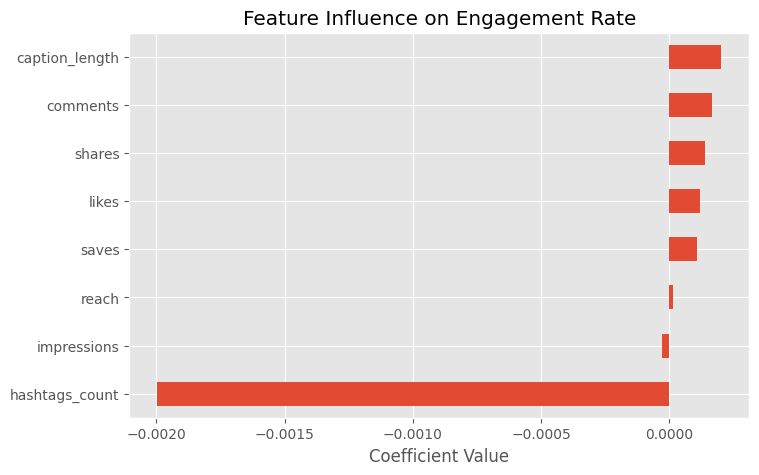

In [16]:
# Display feature importance (coefficients)
coefficients = pd.Series(model.coef_, index=features).sort_values()

coefficients.plot(kind="barh", figsize=(8, 5))
plt.title("Feature Influence on Engagement Rate")
plt.xlabel("Coefficient Value")
plt.show()

## Conclusion

# Key Findings
- Reels and videos tend to generate higher engagement.
- Reach and saves have strong influence on engagement rate.
- Certain content categories attract more followers than others.

# Mchine Learning Insights
- The linear regression model shows a reasonable ability to predict engagement rate.
- Content performance is influenced by multiple engagement metrics, not just likes.

# Feature steps
- Classification (high vs low engagement)
- Add time-series analysis
- Test advanced models (Random Forest, XGBoost)